In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pyaw.utils
from src.pyaw import utils
from src.pyaw import rotate_vector_by_quaternion

In [2]:
fps = [
    r"\\Diskstation1\file_three\aw\swarm\vires\SW_OPER_MAGA_HR_1B\SW_OPER_MAGA_HR_1B_11803_20151231T225422_20160101T002758.pkl",
    r"\\Diskstation1\file_three\aw\swarm\vires\AHY9U3~9\SW_OPER_MAGA_HR_1B\aux_SW_OPER_MAGA_HR_1B_11803_20151231T225422_20160101T002758.pkl",
    r"\\Diskstation1\file_three\aw\swarm\vires\IGRF\SW_OPER_MAGA_HR_1B\IGRF_SW_OPER_MAGA_HR_1B_11803_20151231T225422_20160101T002758.pkl",
    r"\\Diskstation1\file_three\aw\swarm\vires\SW_EXPT_EFIA_TCT16\SW_EXPT_EFIA_TCT16_11803_20151231T225422_20160101T002758.pkl"]


In [3]:
df_b = pd.read_pickle(fps[0])
df_b_aux = pd.read_pickle(fps[1])
df_b_IGRF = pd.read_pickle(fps[2])
df_e = pd.read_pickle(fps[3])

In [4]:
df_b_clip = df_b[['B_NEC', 'Longitude', 'Latitude', 'Radius', 'q_NEC_CRF']]
df_b_aux_clip = df_b_aux[['QDLat', 'QDLon', 'MLT']]
df_b_IGRF_clip = df_b_IGRF[['B_NEC_IGRF']]
df_e_clip = df_e[['Longitude', 'Latitude', 'Radius', 'VsatE', 'VsatN', 'Ehy', 'Ehx']]

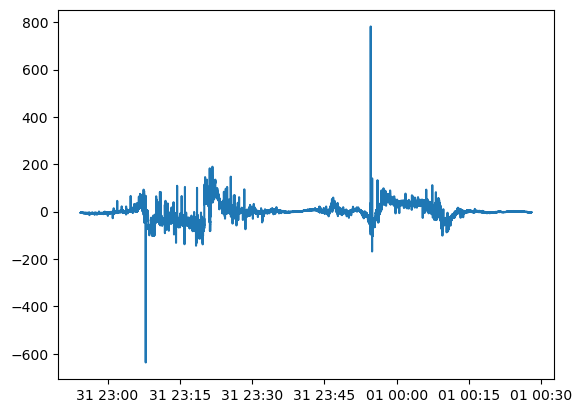

In [5]:
ehx = df_e_clip['Ehx'].values

plt.plot(df_e_clip.index.values, ehx)
plt.show()

In [6]:
ehx = utils.set_outliers_nan_std(ehx, 1, print_=True)
ehx = utils.get_array_interpolated(df_e_clip.index.values, ehx)

26912
[ 45.508533  66.2965    32.56769  ... -31.404358 -31.017471 -35.96947 ]


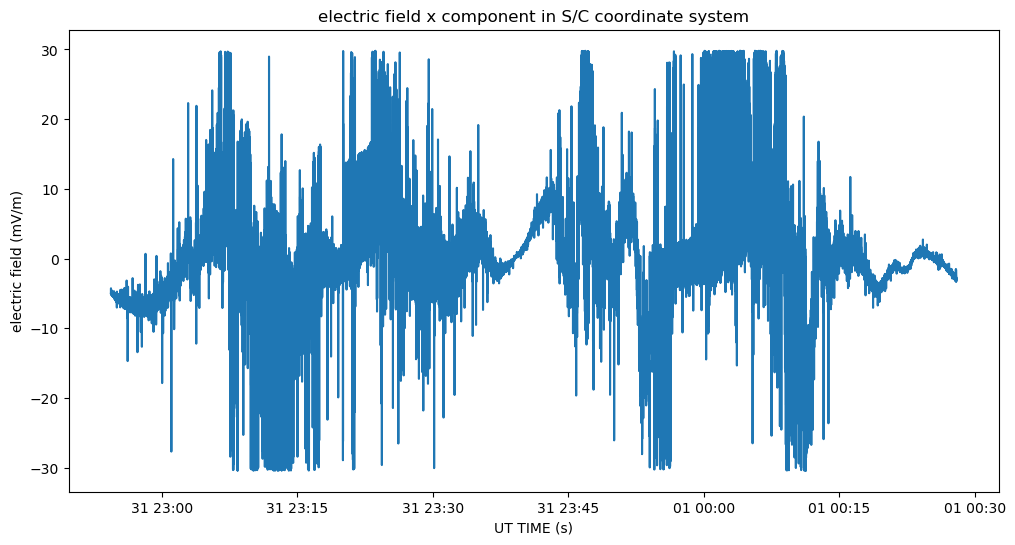

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df_e_clip.index.values, ehx)
plt.title('electric field x component in S/C coordinate system')
plt.xlabel('UT TIME (s)')
plt.ylabel('electric field (mV/m)')
plt.show()

In [8]:
from src.pyaw import SwarmPreprocess

b_nec2sc = SwarmPreprocess.MagPreprocess.NEC2SCofMAG(df_b_clip['B_NEC'].values, df_b_clip['q_NEC_CRF'].values)
b_sc = b_nec2sc.calculate_rotated_vectors()

b_igrf_nec2sc = SwarmPreprocess.MagPreprocess.NEC2SCofMAG(df_b_IGRF_clip['B_NEC_IGRF'].values,
                                                          df_b_clip['q_NEC_CRF'].values)
b_igrf_sc = b_igrf_nec2sc.calculate_rotated_vectors()

by1 = b_sc[:, 1] - b_igrf_sc[:, 1]

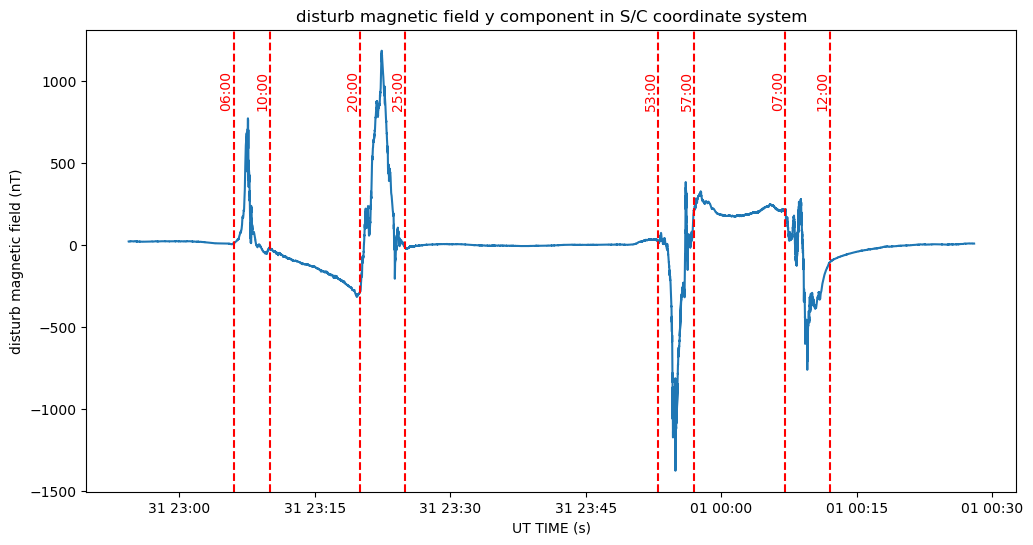

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df_b_clip.index.values, by1)

import matplotlib.dates as mdates


def plot_axvline(y):
    plt.axvline(mdates.date2num(np.datetime64('2015-12-31T23:06:00')), color='red', linestyle='--')
    plt.text(mdates.date2num(np.datetime64('2015-12-31T23:06:00')), max(y) * 0.9, '06:00', color='red', rotation=90,
             ha='right', va='top')

    plt.axvline(mdates.date2num(np.datetime64('2015-12-31T23:10:00')), color='red', linestyle='--')
    plt.text(mdates.date2num(np.datetime64('2015-12-31T23:10:00')), max(y) * 0.9, '10:00', color='red', rotation=90,
             ha='right', va='top')

    plt.axvline(mdates.date2num(np.datetime64('2015-12-31T23:20:00')), color='red', linestyle='--')
    plt.text(mdates.date2num(np.datetime64('2015-12-31T23:20:00')), max(y) * 0.9, '20:00', color='red', rotation=90,
             ha='right', va='top')

    plt.axvline(mdates.date2num(np.datetime64('2015-12-31T23:25:00')), color='red', linestyle='--')
    plt.text(mdates.date2num(np.datetime64('2015-12-31T23:25:00')), max(y) * 0.9, '25:00', color='red', rotation=90,
             ha='right', va='top')

    plt.axvline(mdates.date2num(np.datetime64('2015-12-31T23:53:00')), color='red', linestyle='--')
    plt.text(mdates.date2num(np.datetime64('2015-12-31T23:53:00')), max(y) * 0.9, '53:00', color='red', rotation=90,
             ha='right', va='top')

    plt.axvline(mdates.date2num(np.datetime64('2015-12-31T23:57:00')), color='red', linestyle='--')
    plt.text(mdates.date2num(np.datetime64('2015-12-31T23:57:00')), max(y) * 0.9, '57:00', color='red', rotation=90,
             ha='right', va='top')

    plt.axvline(mdates.date2num(np.datetime64('2016-01-01T00:07:00')), color='red', linestyle='--')
    plt.text(mdates.date2num(np.datetime64('2016-01-01T00:07:00')), max(y) * 0.9, '07:00', color='red', rotation=90,
             ha='right', va='top')

    plt.axvline(mdates.date2num(np.datetime64('2016-01-01T00:12:00')), color='red', linestyle='--')
    plt.text(mdates.date2num(np.datetime64('2016-01-01T00:12:00')), max(y) * 0.9, '12:00', color='red', rotation=90,
             ha='right', va='top')

    return None


plot_axvline(by1)

plt.title('disturb magnetic field y component in S/C coordinate system')
plt.xlabel('UT TIME (s)')
plt.ylabel('disturb magnetic field (nT)')
plt.show()

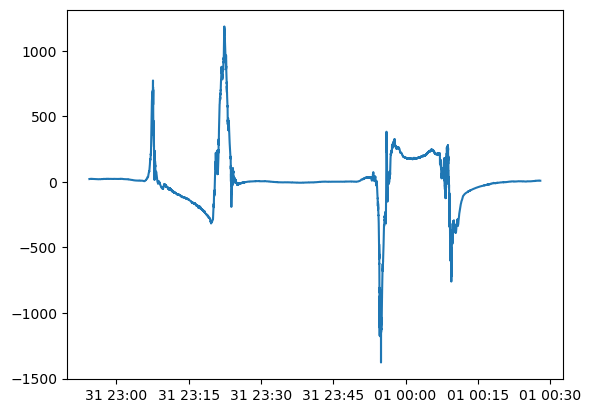

In [10]:
datetimes_e = df_e_clip.index.values
datetimes_b = df_b_clip.index.values

by1 = pyaw.utils.time_align_high2low(by1, datetimes_b, datetimes_e)

plt.plot(df_e_clip.index.values, by1)

In [11]:
from scipy.signal import spectrogram

fs = 16
window = 'hann'
stft_window_seconds = 4
nperseg = int(stft_window_seconds * fs)
noverlap = nperseg // 2

freqs, ts, Sxx_e = spectrogram(ehx, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap, mode='complex')
_, _, Sxx_b = spectrogram(by1, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap, mode='complex')

ts_dt64 = datetimes_e[0] + [np.timedelta64(int(_), 's') for _ in ts]

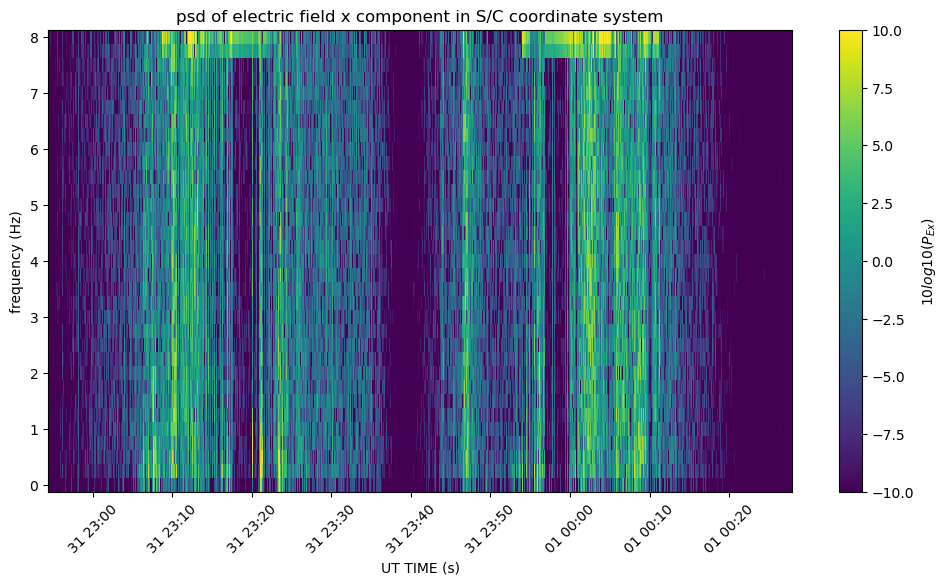

In [12]:
Sxx_e_m = np.abs(Sxx_e)

plt.figure(figsize=(12, 6))
plt.pcolormesh(ts_dt64, freqs, 10 * np.log10(Sxx_e_m), vmin=-10, vmax=10)
plt.colorbar(label=r'$10log10(P_{Ex})$')
plt.xticks(rotation=45)
plt.title('psd of electric field x component in S/C coordinate system')
plt.xlabel('UT TIME (s)')
plt.ylabel('frequency (Hz)')
plt.show()

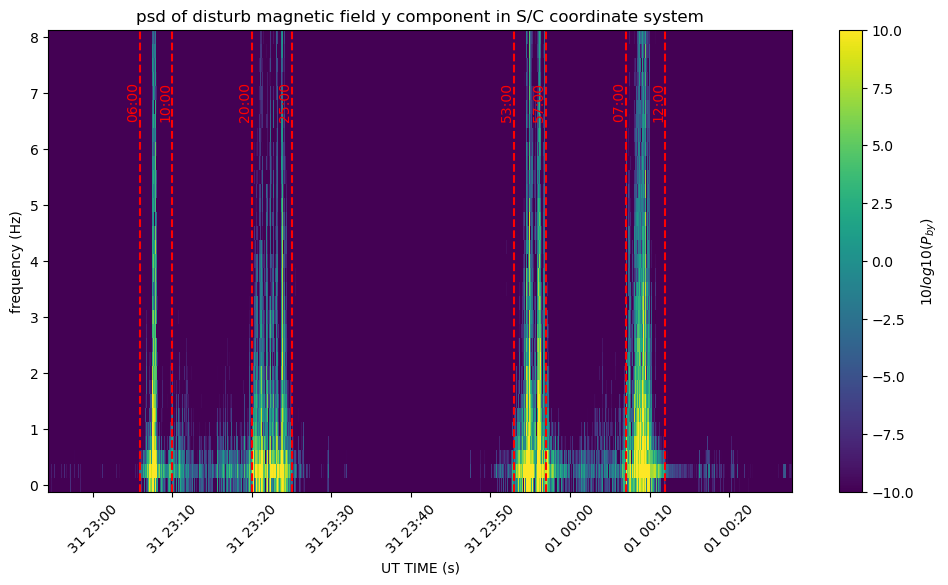

In [13]:
plt.figure(figsize=(12, 6))
Sxx_b_m = np.abs(Sxx_b)
plt.pcolormesh(ts_dt64, freqs, 10 * np.log10(Sxx_b_m), vmin=-10, vmax=10)
plot_axvline(freqs)
plt.colorbar(label=r'$10log10(P_{by})$')
plt.xticks(rotation=45)
plt.title('psd of disturb magnetic field y component in S/C coordinate system')
plt.xlabel('UT TIME (s)')
plt.ylabel('frequency (Hz)')
plt.show()

In [14]:
cpsd = Sxx_e * np.conj(Sxx_b)

cpsd_m = np.abs(cpsd)

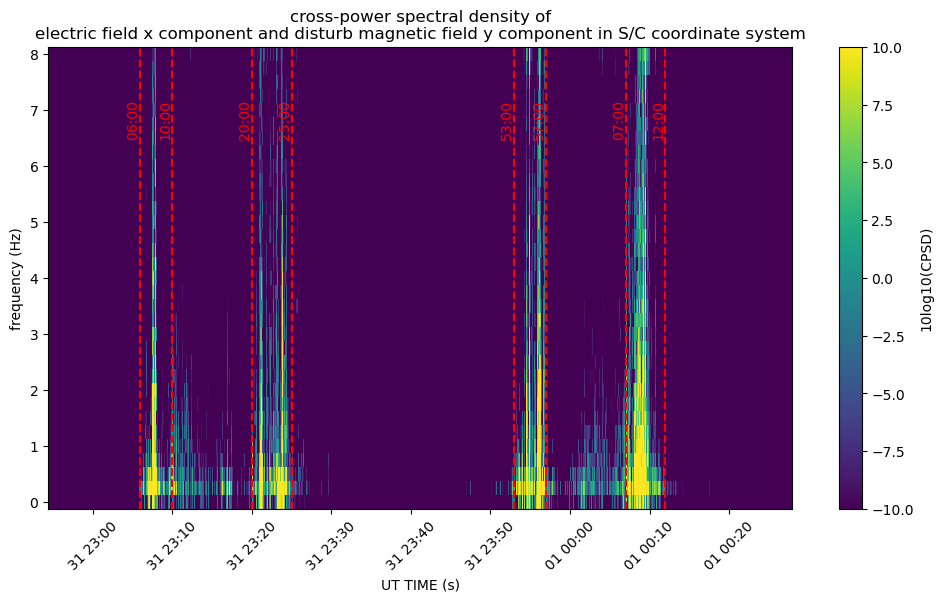

In [15]:
plt.figure(figsize=(12, 6))
plt.pcolormesh(ts_dt64, freqs, 10 * np.log10(cpsd_m), vmin=-10, vmax=10)
plot_axvline(freqs)
plt.xticks(rotation=45)
plt.colorbar(label='10log10(CPSD)')
plt.title(
    'cross-power spectral density of\nelectric field x component and disturb magnetic field y component in S/C coordinate system')
plt.xlabel('UT TIME (s)')
plt.ylabel('frequency (Hz)')
plt.show()

In [16]:
step = 11
coherences = utils.spectral.get_coherence(Sxx_e, Sxx_b, cpsd)

In [17]:
ts_dt64_split = utils.split_array(ts_dt64)

dts_cohe = [pyaw.utils.get_middle_element(i) for i in ts_dt64_split]

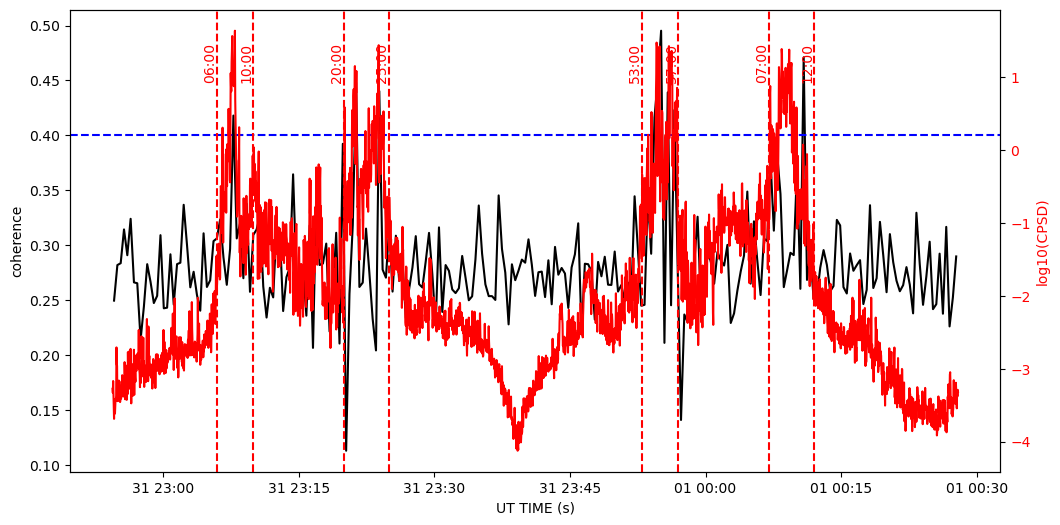

In [18]:
# Create a figure and the first axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first dataset
ax1.plot(dts_cohe, coherences, color='black', label='coherence')
plt.axhline(0.4, color='blue', linestyle='--')
ax1.set_xlabel('UT TIME (s)')
ax1.set_ylabel('coherence', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis with its own x-axis
ax2 = ax1.twinx()  # Share the same x-axis
ax2.plot(ts_dt64, np.log10(cpsd_m.mean(axis=0)), color='red', label='log10(CPSD)')
ax2.set_ylabel('log10(CPSD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plot_axvline(np.log10(cpsd_m.mean(axis=0)))

plt.xticks(rotation=45)
plt.show()

# dynamic 20151231T230750-20151231T230810

In [19]:
st_dy = np.datetime64('2015-12-31T23:07:50')
et_dy = np.datetime64('2015-12-31T23:08:10')
t_mask = (datetimes_e >= st_dy) & (datetimes_e <= et_dy)
datetimes_dy = datetimes_e[t_mask]
ehx_dy = ehx[t_mask]
by1_dy = by1[t_mask]

In [20]:
ehx_dy_fft = utils.spectral.FFT(ehx_dy, fs)
by1_dy_fft = utils.spectral.FFT(by1_dy, fs)

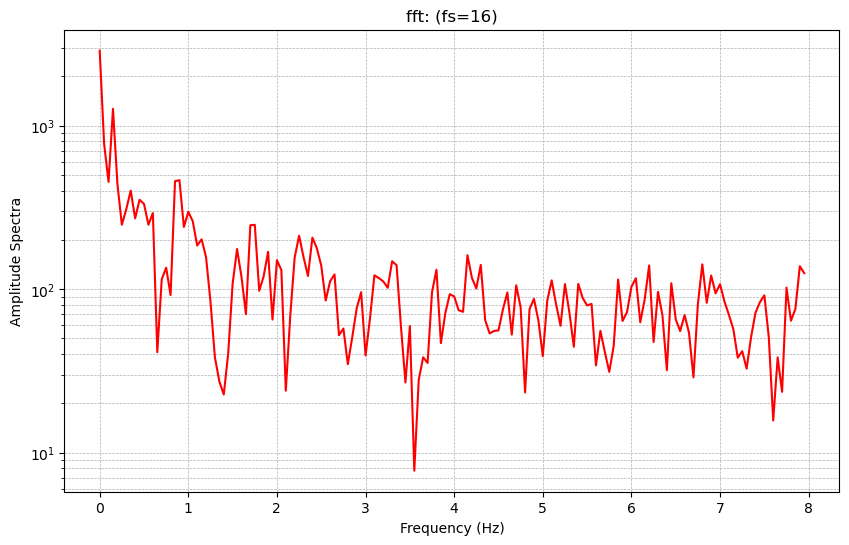

In [21]:
ehx_dy_fft.plot_fft()
plt.show()

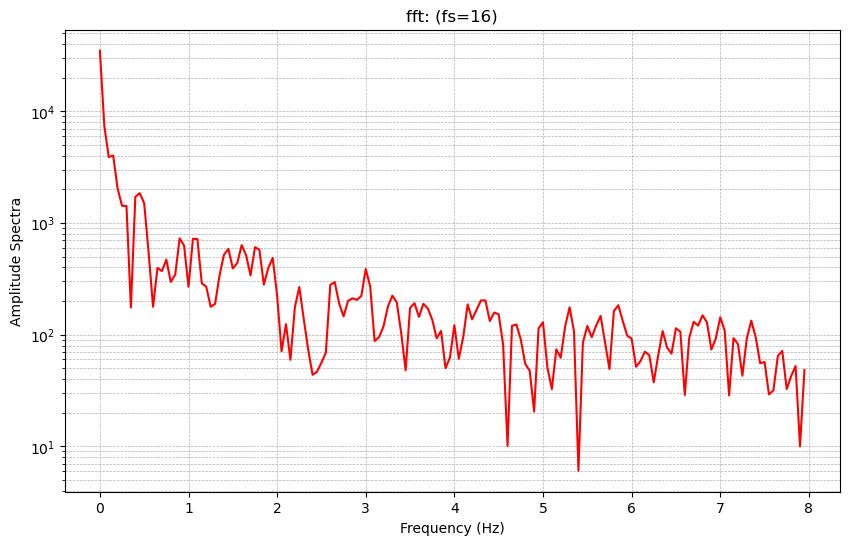

In [22]:
by1_dy_fft.plot_fft()
plt.show()

In [23]:
freqs_dy, amp_e_dy, _ = ehx_dy_fft.get_fft()
_, amp_b_dy, _ = by1_dy_fft.get_fft()

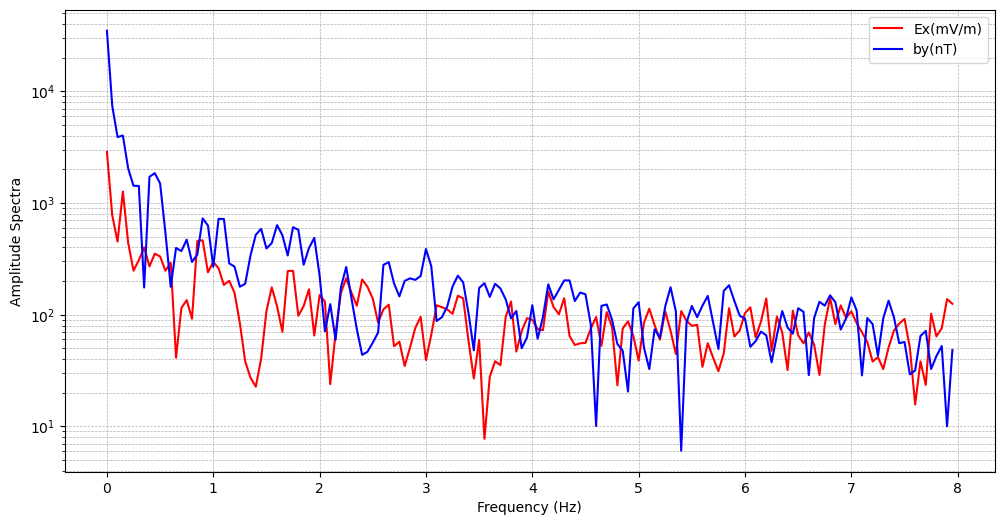

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(freqs_dy, amp_e_dy, color='red', label='Ex(mV/m)')
plt.plot(freqs_dy, amp_b_dy, color='blue', label='by(nT)')
plt.legend()
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude Spectra')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()

In [25]:
eb_ratio_fft_dy = amp_e_dy / amp_b_dy
eb_ratio_fft_dy = eb_ratio_fft_dy * 1e-3 * 1e9  # 此处考虑了单位换算

In [26]:
from src.pyaw import mu0

Sigma_P_dy = 3.0
Sigma_P_sta = 0.5

va_dy = 1.4e6
va_sta = 1.3e6

boundary_l_dy = 1 / (mu0 * Sigma_P_dy)
boundary_h_dy = mu0 * va_dy ** 2 * Sigma_P_dy

boundary_l_sta = 1 / (mu0 * Sigma_P_sta)
boundary_h_sta = mu0 * va_sta ** 2 * Sigma_P_sta

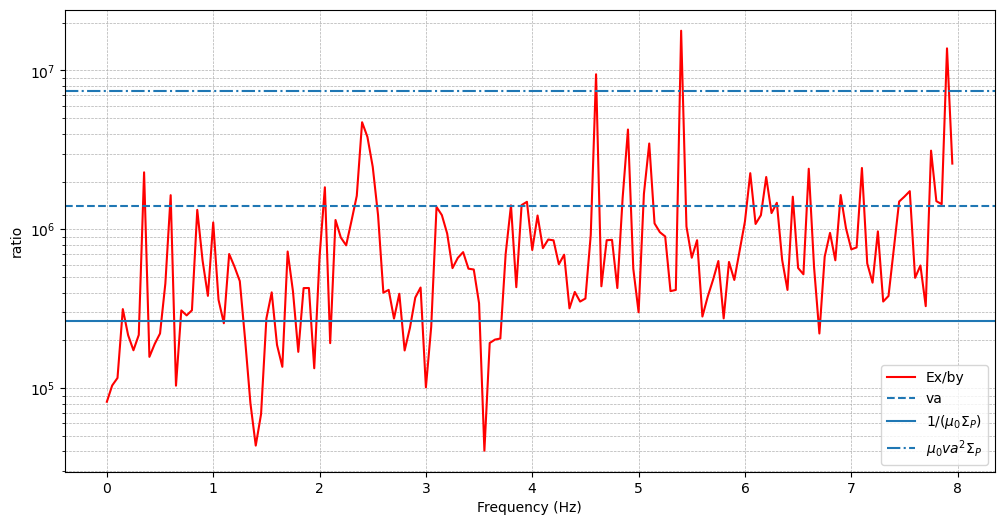

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(freqs_dy, eb_ratio_fft_dy, color='red', label='Ex/by')
plt.axhline(va_dy, linestyle='--', label='va')
plt.axhline(boundary_l_dy, linestyle='-', label=r'$1/(\mu_0 \Sigma_P)$')
plt.axhline(boundary_h_dy, linestyle='-.', label=r'$\mu_0 va^2 \Sigma_P$')
plt.xscale('linear')
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('ratio')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()  # ratio histogram2d 可以作为补充

In [28]:
freqs_dy, ts_dy, Sxx_e_dy = spectrogram(ehx_dy, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap,
                                        mode='complex')
_, _, Sxx_b_dy = spectrogram(by1_dy, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap, mode='complex')

ts_dt64_dy = datetimes_dy[0] + [np.timedelta64(int(_), 's') for _ in ts_dy]

cpsd_dy = Sxx_e_dy * np.conj(Sxx_b_dy)

In [29]:
# phase
cpsd_phase_dy = np.degrees(np.angle(cpsd_dy))
cpsd_m_dy = np.abs(cpsd_dy)

In [30]:
np.min(cpsd_m_dy), np.max(cpsd_m_dy), np.percentile(cpsd_m_dy, 15)

(0.0006684087865727998, 452.71982964619866, 0.030945246811312867)

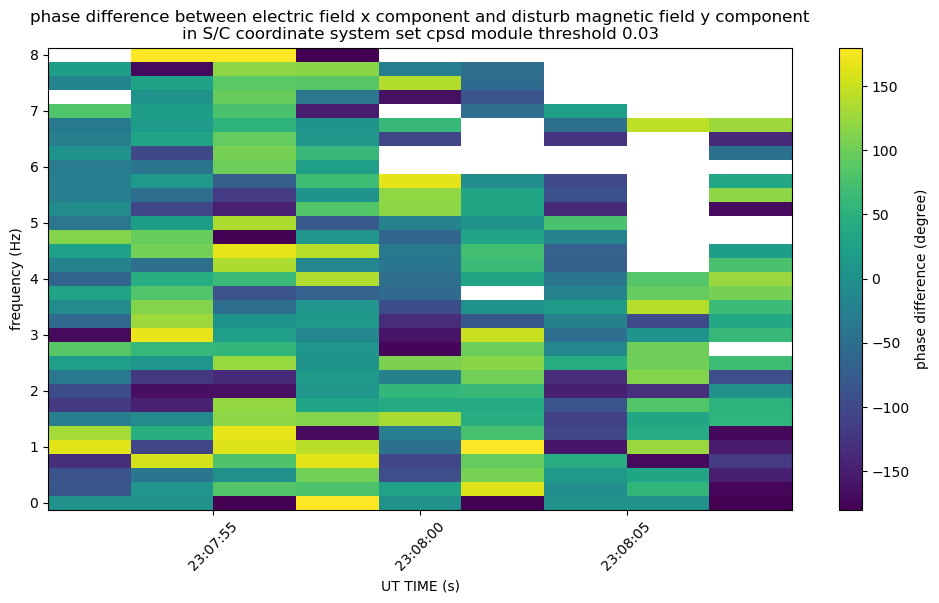

In [31]:
cpsd_phase_dy[cpsd_m_dy < 0.03] = np.nan  # 阈值的选择？
plt.figure(figsize=(12, 6))
plt.pcolormesh(ts_dt64_dy, freqs_dy, cpsd_phase_dy)
plt.xticks(rotation=45)
plt.colorbar(label='phase difference (degree)')
plt.title(
    'phase difference between electric field x component and disturb magnetic field y component\nin S/C coordinate system set cpsd module threshold 0.03')
plt.xlabel('UT TIME (s)')
plt.ylabel('frequency (Hz)')
plt.show()

In [32]:
num_bins = 50
phase_bins_dy, phase_histogram2d_dy = utils.get_phase_histogram2d(freqs_dy, cpsd_phase_dy, num_bins=num_bins)

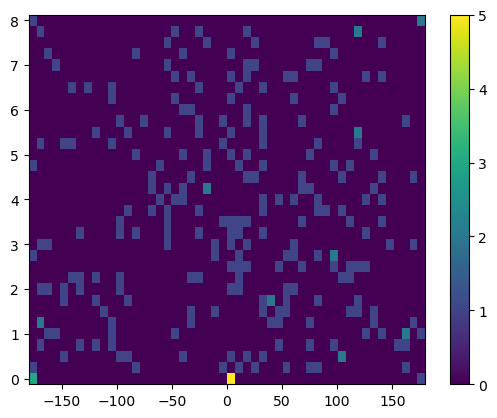

In [33]:
plt.pcolormesh((phase_bins_dy[:-1] + phase_bins_dy[1:]) / 2, freqs_dy, phase_histogram2d_dy)
plt.colorbar()
plt.show()

In [34]:
phase_bins_dy_ave = utils.get_phase_histogram_f_ave(phase_bins_dy, phase_histogram2d_dy)

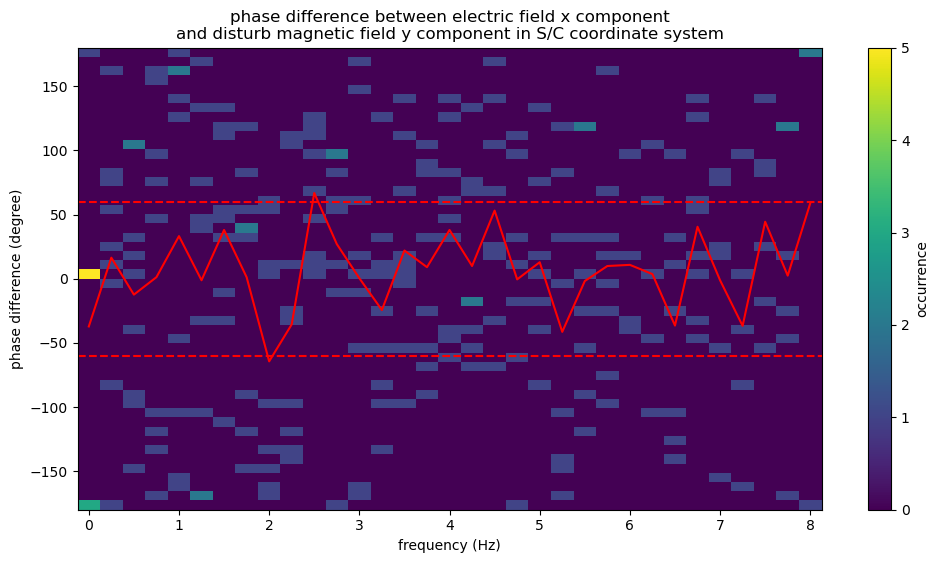

In [35]:
plt.figure(figsize=(12, 6))
plt.pcolormesh(freqs_dy, (phase_bins_dy[:-1] + phase_bins_dy[1:]) / 2, phase_histogram2d_dy.T)
plt.plot(freqs_dy, phase_bins_dy_ave, color='r')
plt.axhline(-60, color='red', ls='--')
plt.axhline(60, color='red', ls='--')
plt.colorbar(label='occurrence')
plt.title(
    'phase difference between electric field x component\nand disturb magnetic field y component in S/C coordinate system')
plt.xlabel('frequency (Hz)')
plt.ylabel('phase difference (degree)')
plt.show()

# static 20151231T230000-20151231T230020

In [36]:
st_sta = np.datetime64('2015-12-31T23:00:00')
et_sta = np.datetime64('2015-12-31T23:00:20')
t_mask = (datetimes_e >= st_sta) & (datetimes_e <= et_sta)
datetimes_sta = datetimes_e[t_mask]
ehx_sta = ehx[t_mask]
by1_sta = by1[t_mask]

In [37]:
ehx_sta_fft = utils.spectral.FFT(ehx_sta, fs)
by1_sta_fft = utils.spectral.FFT(by1_sta, fs)

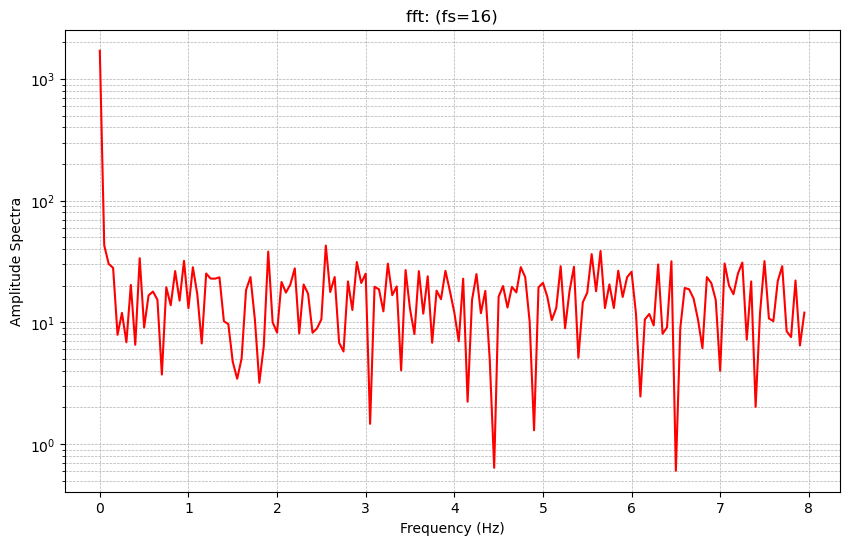

In [38]:
ehx_sta_fft.plot_fft()
plt.show()

<Figure size 1200x600 with 0 Axes>

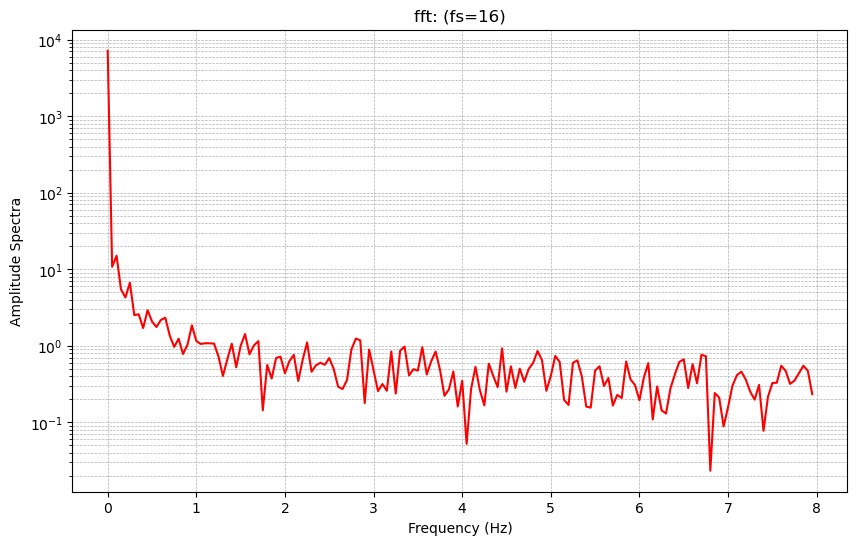

In [39]:
plt.figure(figsize=(12, 6))
by1_sta_fft.plot_fft()
plt.show()

In [40]:
freqs_sta, amp_e_sta, _ = ehx_sta_fft.get_fft()
_, amp_b_sta, _ = by1_sta_fft.get_fft()

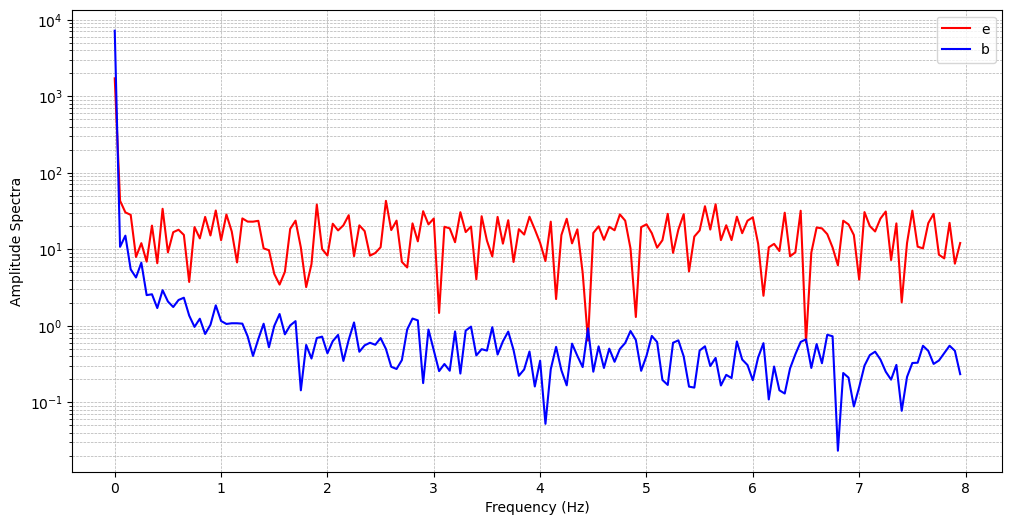

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(freqs_sta, amp_e_sta, color='red', label='Ex(mV/m)')
plt.plot(freqs_sta, amp_b_sta, color='blue', label='by(nT)')
plt.legend()
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude Spectra')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()

In [42]:
eb_ratio_fft_sta = amp_e_sta / amp_b_sta
eb_ratio_fft_sta = eb_ratio_fft_sta * 1e-3 * 1e9

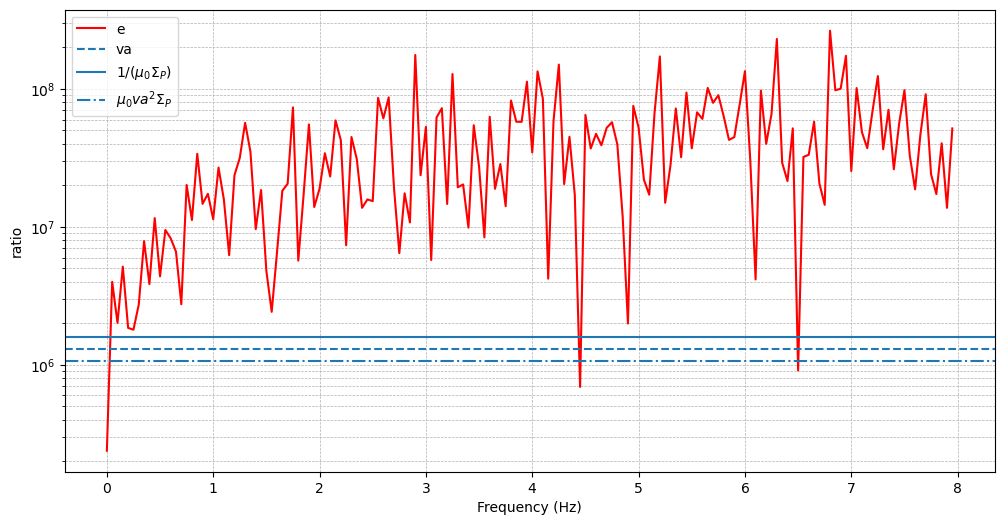

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(freqs_sta, eb_ratio_fft_sta, color='red', label='Ex/by')
plt.axhline(va_sta, linestyle='--', label='va')
plt.axhline(boundary_l_sta, linestyle='-', label=r'$1/(\mu_0 \Sigma_P)$')
plt.axhline(boundary_h_sta, linestyle='-.', label=r'$\mu_0 va^2 \Sigma_P$')
plt.legend()
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('ratio')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()

In [44]:
freqs_sta, ts_sta, Sxx_e_sta = spectrogram(ehx_sta, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap,
                                           mode='complex')
_, _, Sxx_b_sta = spectrogram(by1_sta, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap, mode='complex')

ts_dt64_sta = datetimes_sta[0] + [np.timedelta64(int(_), 's') for _ in ts_sta]

cpsd_sta = Sxx_e_sta * np.conj(Sxx_b_sta)

In [45]:
# phase
cpsd_phase_sta = np.degrees(np.angle(cpsd_sta))
cpsd_m_sta = np.abs(cpsd_sta)
cpsd_phase_sta[cpsd_m_sta < 0.03] = np.nan

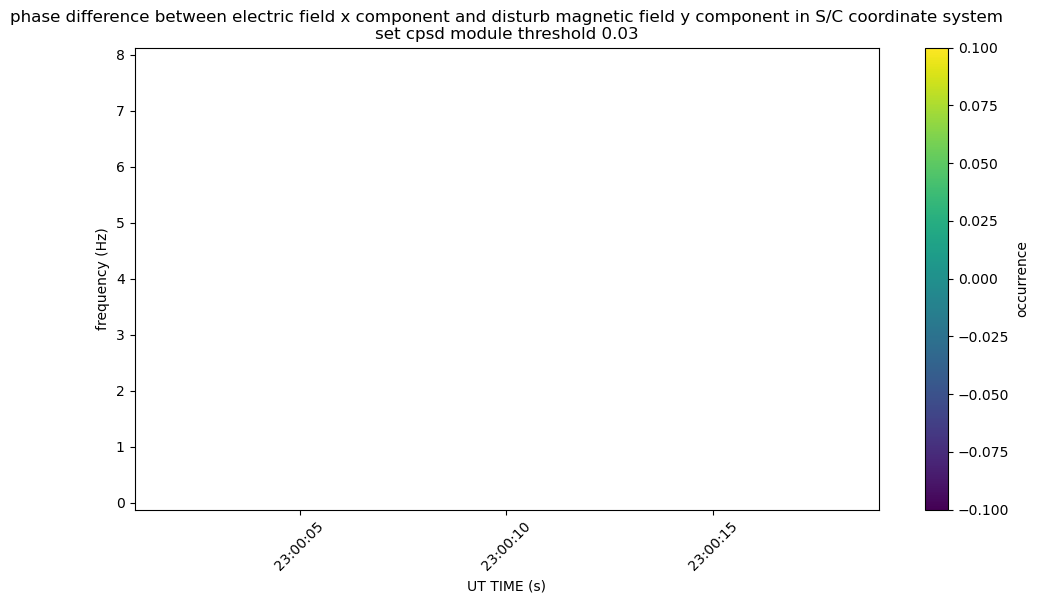

In [46]:
plt.figure(figsize=(12, 6))
plt.pcolormesh(ts_dt64_sta, freqs_sta, cpsd_phase_sta)
plt.xticks(rotation=45)
plt.colorbar(label='occurrence')
plt.title(
    'phase difference between electric field x component and disturb magnetic field y component\nin S/C coordinate system set cpsd module threshold 0.03')
plt.xlabel('UT TIME (s)')
plt.ylabel('frequency (Hz)')
plt.show()